In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

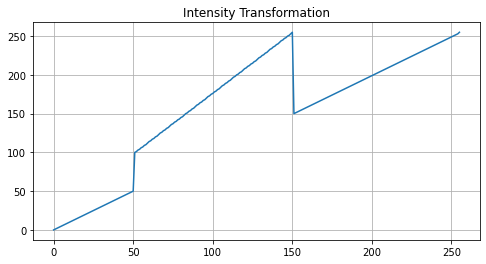

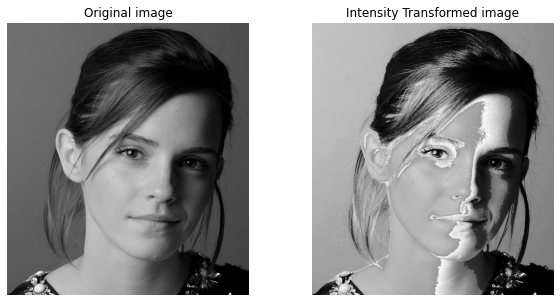

In [22]:
image1 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert image1 is not None

t1 = np.linspace(0, 50, 51)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
plt.subplots(1, 1, figsize = (8, 4))
plt.title("Intensity Transformation")
plt.grid("on")
plt.plot(t)

assert len(t) == 256
image_transformed = cv.LUT(image1, t)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image1)
cv.waitKey(1000)
cv.imshow("Image", image_transformed)
cv.waitKey(1000)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title("Intensity Transformed image")
ax[1].axis("off")

plt.show()

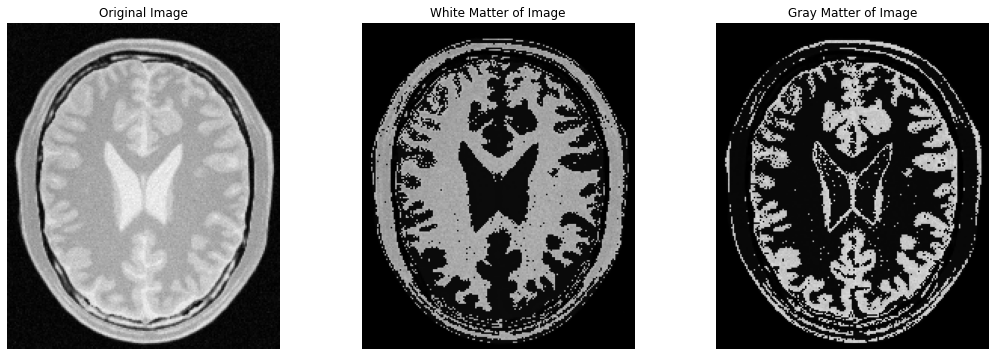

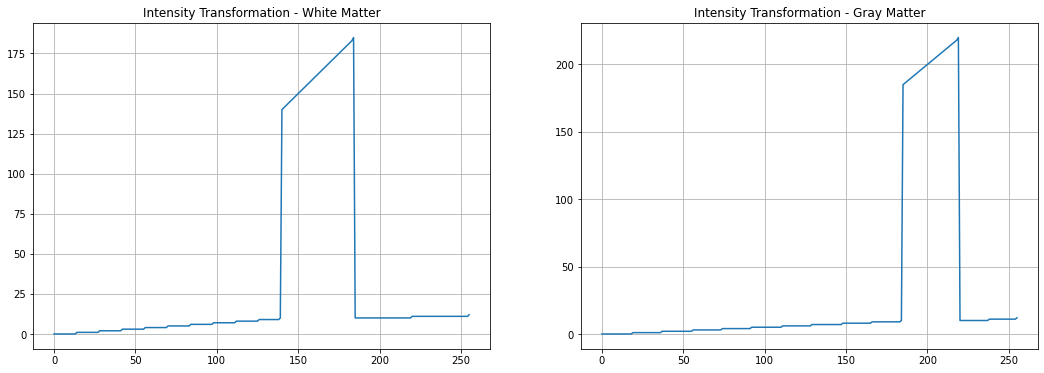

In [23]:
image2 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert image2 is not None

t1 = np.linspace(0, 10, 140)
t2 = np.linspace(140, 185, 45)
t3 = np.linspace(10, 12, 71)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

r1 = np.linspace(0, 10, 185)
r2 = np.linspace(185, 220, 35)
r3 = np.linspace(10, 12, 36)
r = np.concatenate((r1, r2, r3), axis = 0).astype(np.uint8)

assert len(t) == 256
image_t1 = cv.LUT(image2, t)

assert len(r) == 256
image_t2 = cv.LUT(image2, r)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image2)
cv.waitKey(1000)
cv.imshow("Image", image_t1)
cv.waitKey(1000)
cv.imshow("Image", image_t2)
cv.waitKey(1000)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize = (18, 6))

ax[0].imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(image_t1, cv.COLOR_BGR2RGB))
ax[1].set_title("White Matter of Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(image_t2, cv.COLOR_BGR2RGB))
ax[2].set_title("Gray Matter of Image")
ax[2].axis("off")

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
ax[0].plot(t)
ax[0].set_title("Intensity Transformation - White Matter")
ax[0].grid("on")

ax[1].plot(r)
ax[1].set_title("Intensity Transformation - Gray Matter")
ax[1].grid("on")


plt.show()

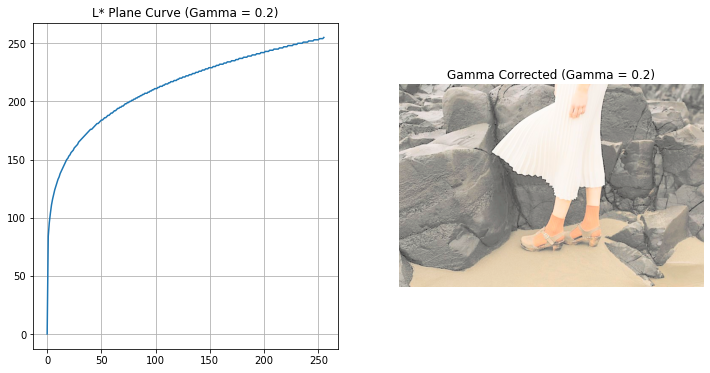

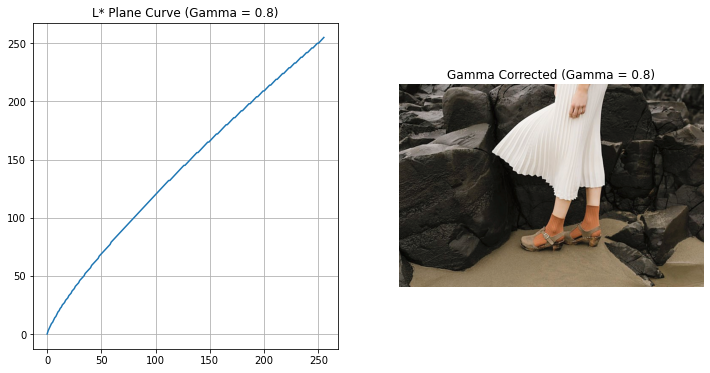

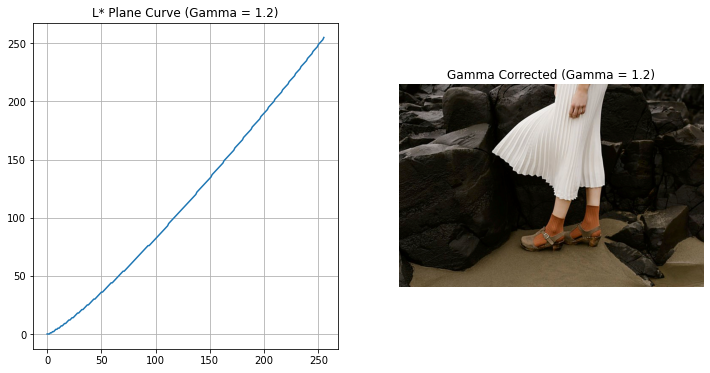

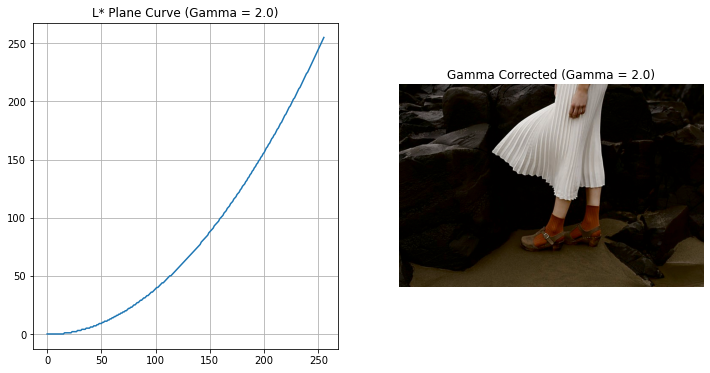

In [24]:
image3 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert image3 is not None

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", image3)
cv.waitKey(1000)
cv.destroyAllWindows()

gamma = [0.2, 0.8, 1.2, 2.0]

lab = cv.cvtColor(image3, cv.COLOR_BGR2LAB)
L, A, B = cv.split(lab)

hist_gamma=[]

for i in gamma:
    lookUpTable = np.array([(p/255)**(i)*255 for p in range(0, 256)]).astype(np.uint8)
    
    L_G = cv.LUT(L, lookUpTable)
    lab_gamma = cv.merge([L_G, A, B])
    hist_gamma.append(cv.calcHist([lab_gamma],[0],None,[256],[0,256]))
    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2RGB)
    
    
    
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].plot(lookUpTable)
    ax[0].set_title("L* Plane Curve (Gamma = " + str(i) + ")")
    ax[0].grid("on")
    
    ax[1].imshow(img)
    ax[1].set_title("Gamma Corrected (Gamma = " + str(i) + ")")
    ax[1].axis("off")

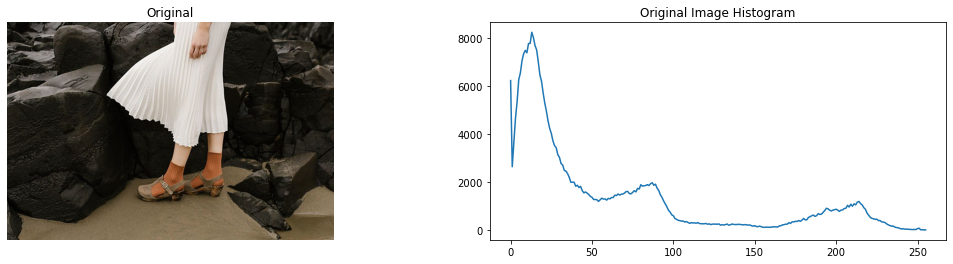

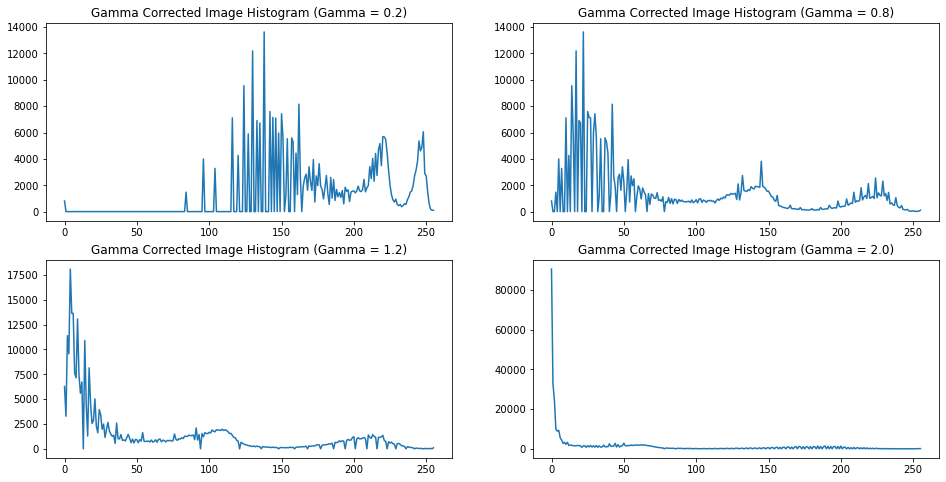

In [25]:
hist_image3 = cv.calcHist([image3], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
ax[0].imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
ax[0].axis("off")
ax[0].set_title("Original")

ax[1].plot(hist_image3)
ax[1].set_title("Original Image Histogram")

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

for i in range(len(hist_gamma)):
    ax[i//2, i%2].plot(hist_gamma[i])
    ax[i//2, i%2].set_title("Gamma Corrected Image Histogram (Gamma = " + str(gamma[i]) + ")")

    

plt.show()

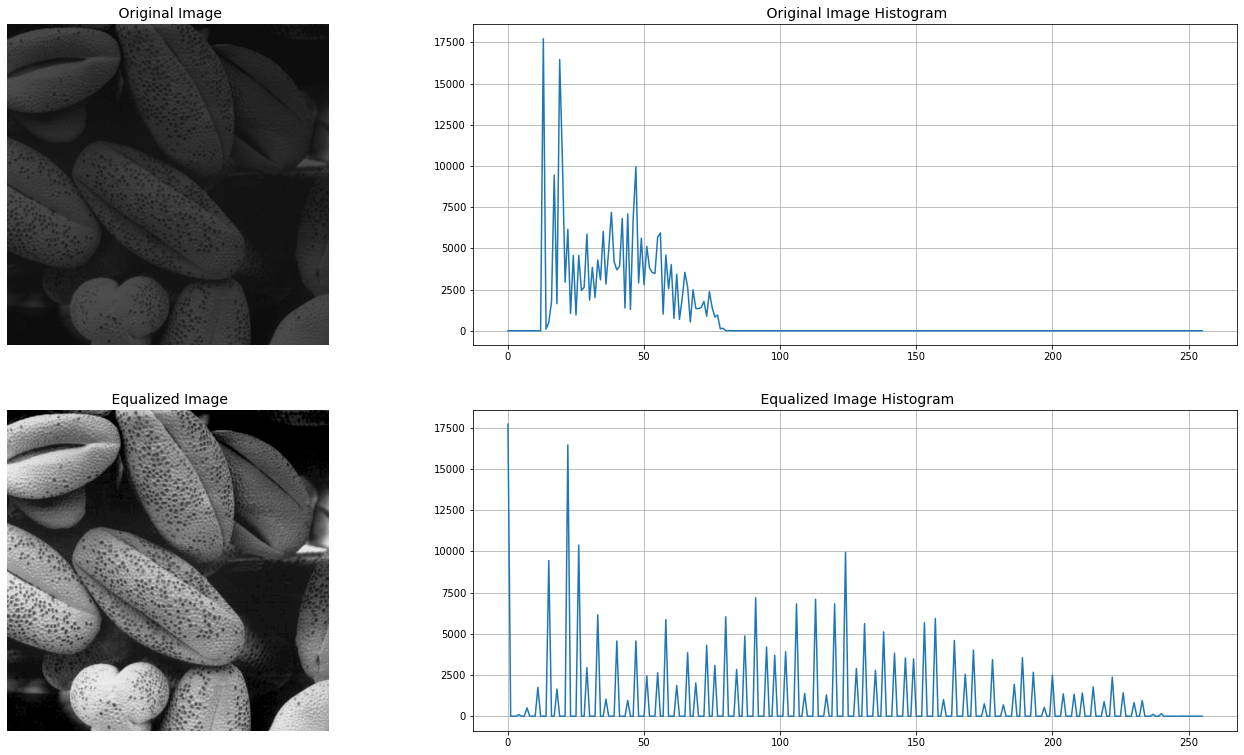

In [26]:
image4 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\shells.png", cv.IMREAD_GRAYSCALE)
assert image4 is not None
im4copy = image4.copy()

high = 0
low = 0

hist = np.zeros(256)
for i in range(image4.shape[0]):
    for j in range(image4.shape[1]):
        for k in range(256):
            if image4[i,j] == k:
                hist[k] += 1
                break
                
for i in range(0, 256, 1):
        if (hist[i] != 0):
            low = i
            break
    
for i in range(255, -1, -1):
    if (hist[i] != 0):
        high = i
        break

for i in range(im4copy.shape[0]):
    for j in range(im4copy.shape[1]):
        for k in range(high):
            if im4copy[i,j] == k:
                im4copy[i,j] = round((k-low)*((255-0)/(high-low)) + 0)
                break

hist_equalized = np.zeros(256)
for i in range(im4copy.shape[0]):
    for j in range(im4copy.shape[1]):
        for k in range(256):
            if im4copy[i,j] == k:
                hist_equalized[k] += 1
                break

cv.imshow('Image', im4copy)
cv.waitKey(1000)
cv.destroyAllWindows()
    
fig, ax = plt.subplots(2, 2, figsize=(26, 13))
plt.subplots_adjust(wspace = -0.1, hspace = None)

ax[0,0].imshow(cv.cvtColor(image4 ,cv.COLOR_BGR2RGB))
ax[0,0].set_title(" Original Image", fontsize = 14)
ax[0,0].axis("off")

ax[0,1].plot(hist)
ax[0,1].set_title(" Original Image Histogram", fontsize = 14)
ax[0,1].grid('on')

ax[1,0].imshow(cv.cvtColor(im4copy ,cv.COLOR_BGR2RGB))
ax[1,0].set_title(" Equalized Image", fontsize = 14)
ax[1,0].axis("off")

ax[1,1].plot(hist_equalized )
ax[1,1].set_title(" Equalized Image Histogram", fontsize = 14)
ax[1,1].grid('on')

plt.show()

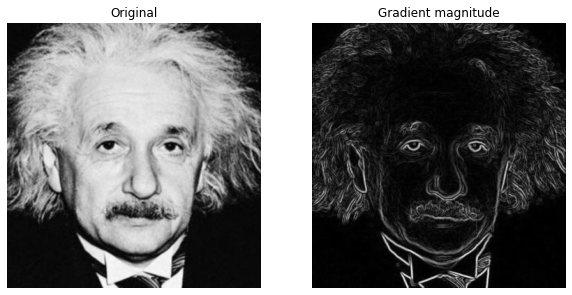

In [27]:
image6 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert image6 is not None

sobel_h= np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
f_x = cv.filter2D(image6, -1, sobel_h)

sobel_v = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
f_y = cv.filter2D(image6, -1, sobel_v)

grad_mag = np.sqrt(f_x**2 + f_y**2)

fig, ax = plt.subplots(1, 2, figsize = (10, 10))

ax[0].imshow(image6, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(grad_mag, cmap = "gray")
ax[1].set_title("Gradient magnitude")
ax[1].axis("off")

plt.show()

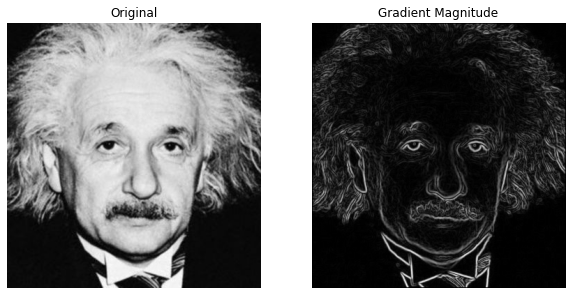

In [28]:
m = image6.shape[0]
n = image6.shape[1]
im_sobel1 = np.zeros((m, n), np.uint8)
for i in range(1, m-1):
    for j in range(1, n-1):
        f_xx = image6[i-1, j-1]*(-1) + image6[i-1, j]*(-2) + image6[i-1, j+1]*(-1) + image6[i+1, j-1]*1 + image6[i+1, j]*2 + image6[i+1, j+1]*1
        f_yy = image6[i-1, j-1]*(-1) + image6[i, j-1]*(-2) + image6[i-1, j+1]*1 + image6[i+1, j-1]*(-1) + image6[i, j+1]*2 + image6[i+1, j+1]*1
        val = np.sqrt(f_xx**2 + f_yy**2)
        im_sobel1[i, j] = (val / 1020) * 255

fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image6, cmap = "gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(im_sobel1, cmap = "gray")
ax[1].set_title("Gradient Magnitude")
ax[1].axis("off")

plt.show()

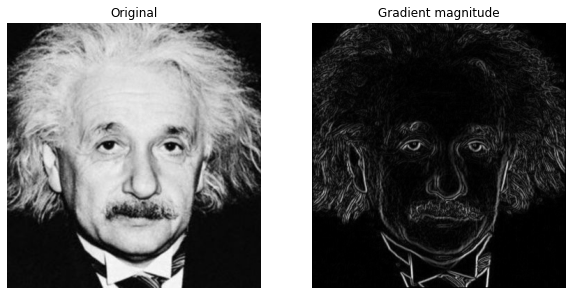

In [29]:
im_sobel2 = np.zeros((image6.shape[0],image6.shape[1]),np.uint8)

mat = np.multiply((np.array([[1],[2],[1]], dtype=np.float32)),(np.array([1,0,-1], dtype=np.float32)))
sobel_hh = (-1)*mat
sobel_vv = sobel_hh.T

for i in range(1,image6.shape[0]-1):
    for j in range(1,image6.shape[1]-1):
        image = np.array([[image6[i-1,j-1],image6[i,j],image6[i+1,j+1]], [image6[i,j-1],image6[i,j],image6[i,j+1]], [image6[i+1,j-1],image6[i+1,j],image6[i+1,j+1]]], dtype=np.float32)
        f_xxx = 0
        f_yyy = 0
        for k in range(3):
            for m in range(3):
                f_xxx += image[k][m]*sobel_hh[k][m]
                f_yyy += image[k][m]*sobel_vv[k][m]
        grad = np.sqrt(f_xxx**2 + f_yyy**2)
        im_sobel2[i, j] = (grad / 1020) * 255
                
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image6, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(im_sobel2, cmap = 'gray')
ax[1].set_title("Gradient magnitude")
ax[1].axis('off')

plt.show()

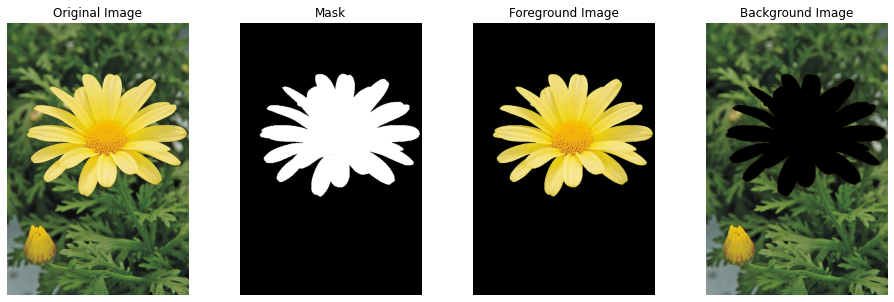

In [30]:
image7 = cv.imread(r"C:\Users\Samal\Desktop\Sem 4\Image Processing and Machine Vision\Assignment 01\daisy.jpg", cv.IMREAD_COLOR)
image7_original = image7.copy()

mask = np.zeros(image7.shape[:2], np.uint8)
rect = (0, 90, 560, 500)
foreGroundModel = np.zeros((1, 65), np.float64)
backGrounddModel = np.zeros((1, 65), np.float64)

cv.grabCut(image7, mask, rect, backGrounddModel, foreGroundModel, 5, cv.GC_INIT_WITH_RECT)

mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
im_fgd = image7*mask1[:, :, np.newaxis]
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
im_bgd = image7*mask2[:, :, np.newaxis]

fig, ax = plt.subplots(1, 4, figsize=(16, 5))

ax[0].imshow(cv.cvtColor(image7_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask1, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im_fgd, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(im_bgd, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
ax[3].axis("off")

plt.show()

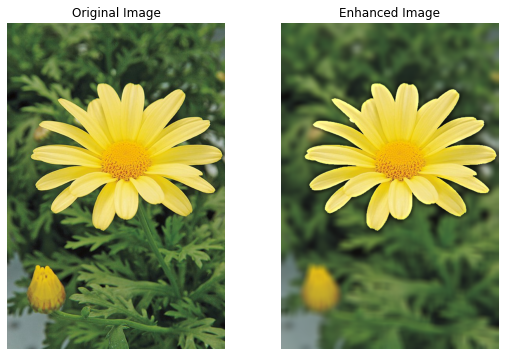

In [31]:
im7_blurred = cv.blur(im_bgd, (20, 20))
im7_enhanced = cv.add(im7_blurred, im_fgd)

fig, ax = plt.subplots(1, 2, figsize=(9, 6))

ax[0].imshow(cv.cvtColor(image7_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im7_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.show()